# 0. Preparations

In [1]:
from utils import show_image_from_response, show_image_from_path

In [14]:
from pathlib import Path
from typing import Union

import requests
from skimage.io import imread

from config.config import ApiConfig


def image_request(model_name: str, img_path: Union[str, Path], verbose=True, input_params=None):
    config = ApiConfig()
    print("Reading input sample to memory...")
    image = imread(img_path)


    if input_params: json_data = {"input_payload": image.tolist(), "input_parameters": input_params}
    else: json_data = {"input_payload": image.tolist()}

    print("Make predict request to inference API...")
    response = requests.post(
        url=f"{config.API_URL}/image/{model_name}/predict",
        json=json_data,
        headers=config.headers
    )
    if verbose: print(f"Response received: {response}")
    response.raise_for_status()
    return response.json()


# 1. Image Classification with Simple TensorFlow Model
This is a simple image classifier trained on Cifar-10.

The following shows the picture that will be posted to https://www.inferencehub.io/.

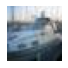

In [3]:
show_image_from_path("input_samples/image-tensorflow-simple-img-classifier.jpg", size=(1, 1))

We can post this picture to our API now, where the TensorFlow Classifier is uploaded:

In [4]:
resp = image_request('tensorflow-simple-img-classifier', "input_samples/image-tensorflow-simple-img-classifier.jpg")
# resp['Payload']

Reading input sample to memory...
Make predict request to inference API...
Response received: <Response [200]>


# 2. Unet
This model is used for image segmentation and is trained on cars.

The following shows the input sample and the corresponding prediction output:

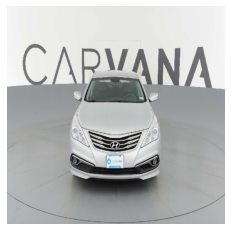

Reading input sample to memory...
Make predict request to inference API...


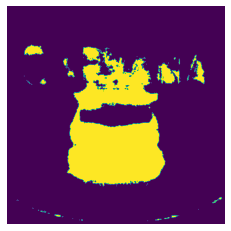

In [5]:
show_image_from_path("input_samples/image-unet.png")
resp = image_request('1312131', "input_samples/image-unet.png", verbose=False)
show_image_from_response(resp)

# Yolo5
This is a standard version of the YOLOv5 model from https://github.com/ultralytics/yolov5.

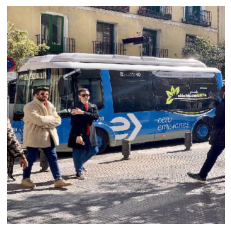

Reading input sample to memory...
Make predict request to inference API...
Response received: <Response [500]>


HTTPError: 500 Server Error: Internal Server Error for url: https://api.inferencehub.io/model/image/YOLOv5m/predict

In [20]:
show_image_from_path("input_samples/image-yolo5.jpg")
resp = image_request('YOLOv5m', "input_samples/image-yolo5.png", verbose=True)
# show_image_from_response(resp)